# German Traffic Signal Dataset

# 1: Introduction

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. Following are the details of the dataset

<br> 1. Single-image, multi-class classification problem
<br> 2. More than 40 classes
<br> 3. More than 50,000 images in total
<br> 4. Large, lifelike database

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('cnn-model-for-german-traffic-sing')
jovian.set_colab_id('1nRQFN66i4G0x8Cv1PTs1AiBkUquRyeck')

     |████████████████████████████████| 71kB 6.6MB/s 


# 2: Data Pre processing

2.1 Loading the required Libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import shutil

2.4.1


In [ ]:
! pip install opendatasets --upgrade

Requirement already up-to-date: opendatasets in /usr/local/lib/python3.7/dist-packages (0.1.10)


In [ ]:
from google.colab import files
files.upload()

import opendatasets as od

dataset_url = 'https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'
od.download(dataset_url)

Saving kaggle.json to kaggle (1).json


  1%|▏         | 9.00M/612M [00:00<00:09, 68.7MB/s]

100%|██████████| 612M/612M [00:03<00:00, 212MB/s]


## 2.2 Get Data

In [ ]:
df = pd.read_csv('/content/gtsrb-german-traffic-sign/Meta.csv')
df1 = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')
df2 = pd.read_csv('/content/gtsrb-german-traffic-sign/Train.csv')

In [ ]:
df.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [ ]:
df1.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
df2.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
## Reading the image size

import cv2

im = cv2.imread('/content/gtsrb-german-traffic-sign/Train/0/00000_00000_00000.png')

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(30, 29, 3)
<class 'tuple'>


## 2.3 Data Augmentation

In [ ]:
## Setting up the Augmentation 

train_dir = '/content/gtsrb-german-traffic-sign/Train'

train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
     train_dir,  # This is the source directory for training images
     subset='training',
     target_size=(30, 30),  # All images will be resized to 150x150
     batch_size=32,
     color_mode='rgb',    
     shuffle=True,
     seed=42,
        # Since we use binary_crossentropy loss, we need binary labels
     class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_dir,
        subset='validation',
        target_size=(30, 30),
        batch_size=32,
        color_mode='rgb',    
        shuffle=True,
        seed=42,
        class_mode='categorical')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


# 3. Building the CNN Model and Running the validaitons

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(30,30,3)),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(43, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/10
980/980 [==============================] - 37s 35ms/step - loss: 3.1991 - accuracy: 0.1312 - val_loss: 2.7157 - val_accuracy: 0.2261
Epoch 2/10
980/980 [==============================] - 33s 34ms/step - loss: 2.1354 - accuracy: 0.3538 - val_loss: 2.1097 - val_accuracy: 0.3529
Epoch 3/10
980/980 [==============================] - 33s 34ms/step - loss: 1.5648 - accuracy: 0.4784 - val_loss: 1.8495 - val_accuracy: 0.4332
Epoch 4/10
980/980 [==============================] - 33s 34ms/step - loss: 1.2502 - accuracy: 0.5687 - val_loss: 1.6320 - val_accuracy: 0.5017
Epoch 5/10
980/980 [==============================] - 33s 34ms/step - loss: 1.0045 - accuracy: 0.6538 - val_loss: 1.3993 - val_accuracy: 0.5769
Epoch 6/10
980/980 [==============================] - 34s 34ms/step - loss: 0.8360 - accuracy: 0.7119 - val_loss: 1.3014 - val_accuracy: 0.6292
Epoch 7/10
980/980 [==============================] - 33s 34ms/step - loss: 0.7163 - accuracy: 0.7528 - val_loss: 1.2159 - val_accuracy:

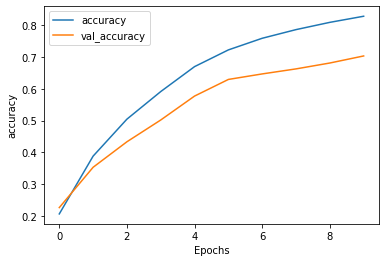

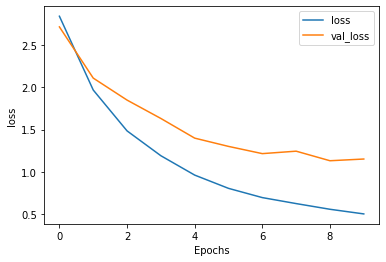

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

An accuracy of 82 percent is acheived. It is also observed from the above values of validation accuracy that the results are not over fitting.

In [ ]:
df1.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


## 3.1 Reading the test data

In [ ]:
from shutil import copyfile


src_dir  = "/content/gtsrb-german-traffic-sign/"
test_dir = "/content/gtsrb-german-traffic-sign/Test_1/"

os.makedirs(test_dir)
for i in range(len(df1)):
    if not os.path.exists(test_dir+str(df1.iloc[i].ClassId)):
      os.makedirs(test_dir+str(df1.iloc[i].ClassId))
    copyfile(src_dir+df1.iloc[i].Path, test_dir+str(df1.iloc[i].ClassId)+'/'+df1.iloc[i].Path[5:])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(30,30),
    batch_size=32,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 12630 images belonging to 43 classes.


In [ ]:
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size

score = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss: 0.6459671854972839
Test accuracy: 0.8278870582580566


In [2]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/hargurjeet/cnn-model-for-german-traffic-sing


'https://jovian.ai/hargurjeet/cnn-model-for-german-traffic-sing'